## Lista 3

In [239]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from patsy import dmatrices
from sklearn import metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay

import warnings

In [240]:
warnings.filterwarnings('ignore')

### Zadanie 1

W zadaniu pierwszym należało stworzyć dwa modele regresji liniowej dla *mpg* jako zmiennej zależnej. W pierwszym modelu należało zmienną *year* potraktować jako zmienną ciągłą a w drugim jako zmienną kategoryczną. Za te kroki odpowiada poniższy kod:

In [258]:
PATH = f'Downloads/'

df = pd.read_csv(f'{PATH}/Auto.csv')
df.head(n = 6)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500


In [259]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [260]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

Kod funkcji odpowiadającej za regresje liniową:

In [261]:
def my_linear_regression(training_set, validation_set, model_formula, printMSE=False):
    y_train, X_train = dmatrices(model_formula, data=training_set, return_type='dataframe')
    y_valid, X_valid = dmatrices(model_formula, data=validation_set, return_type='dataframe')
    
    model = sm.OLS(y_train, X_train)
    result = model.fit()
    
    if printMSE == True:
        y_train_prediction = result.predict(X_train)
        y_valid_prediction = result.predict(X_valid)
        
        print(f'Błąd na zbiorze treningowym: {metrics.mean_squared_error(y_train, y_train_prediction)}')
        print(f'Błąd na zbiorze walidacyjnym: {metrics.mean_squared_error(y_valid, y_valid_prediction)}')
    
    return result

Przygotowuje zbiory danych:

In [262]:
mask = np.random.rand(len(df)) < 0.8

training_set = df[mask]
validation_set = df[~mask]

In [263]:
training_set = training_set.loc[training_set['horsepower'] != '?']
validation_set = validation_set.loc[validation_set['horsepower'] != '?']

training_set = training_set.astype({'horsepower': 'int64'})
validation_set = validation_set.astype({'horsepower': 'int64'})

Następnie tworze modele ze zmienną *year* jako zmienna kategoryczna i jako zmienna ciągła:

In [264]:
patsy_formulas = ['mpg ~ cylinders + displacement*horsepower + weight + acceleration + C(year)', 
                 'mpg ~ cylinders + displacement*horsepower + weight + acceleration + year']

Wyniki dla modelu ze zmienną *year* jako zmienna kategoryczna:

In [265]:
result_1 = my_linear_regression(training_set, validation_set, patsy_formulas[0], True)
print(result_1.summary())

Błąd na zbiorze treningowym: 6.903201940718109
Błąd na zbiorze walidacyjnym: 6.928777425039243
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     128.6
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          9.44e-129
Time:                        17:45:53   Log-Likelihood:                -756.02
No. Observations:                 317   AIC:                             1550.
Df Residuals:                     298   BIC:                             1621.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Jak widać błędy na zbiorze treningowym i walidacyjnym są małe a wartości $R^{2}$ oraz $\bar{R^{2}}$ są duże co oznacza, że dopasowanie prostej do danych jest dobre.

Wyniki dla modelu ze zmienną *year* jako zmienna ciągła:

In [266]:
training_set_1 = training_set.astype({'year': 'float64'})
validation_set_1 = validation_set.astype({'year': 'float64'})

result_2 = my_linear_regression(training_set_1, validation_set_1, patsy_formulas[1], True)
print(result_2.summary())

Błąd na zbiorze treningowym: 8.421240178196092
Błąd na zbiorze walidacyjnym: 8.892076958363075
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     273.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          2.90e-128
Time:                        17:45:59   Log-Likelihood:                -787.53
No. Observations:                 317   AIC:                             1591.
Df Residuals:                     309   BIC:                             1621.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Jak widać (na tych samych zbiorach walidacyjnych) błędy są trochę większe niż w pierwszym przypadku i wartości $R^{2}$ oraz $\bar{R^{2}}$ są również mniejsze (czyli w tym przypadku dopasowanie prostej do danych jest gorsze). Zatem pierwszy model można uznać za (nieznacznie) lepszy niż drugi.

Sprawdźmy ile mamy wartości w kolumnie *year* w data frame:

In [267]:
df['year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [268]:
df['year'].unique().size

13

Dodajmy trochę nowych wartości dla predyktora *year* (tak aby miał $> 13$ wartości):

In [270]:
new_df = df

new_df.at[279, 'year'] = 86
new_df.at[119, 'year'] = 85
new_df.at[50, 'year'] = 88
new_df.at[30, 'year'] = 87
new_df.at[150, 'year'] = 89
new_df.at[151, 'year'] = 90
new_df.at[396, 'year'] = 90

new_df['year'].unique().size


19

Następnie przeprowadźmy regresje liniową dla obu przypadków (*year* jako zmienna kategoryczna i jako zmienna ciągła):

In [271]:
training_set = new_df[mask]
validation_set = new_df[~mask]

training_set = training_set.loc[training_set['horsepower'] != '?']
validation_set = validation_set.loc[validation_set['horsepower'] != '?']

training_set = training_set.astype({'horsepower': 'int64'})
validation_set = validation_set.astype({'horsepower': 'int64'})

result_1 = my_linear_regression(training_set, validation_set, patsy_formulas[0], True)
print(result_1.summary())

Błąd na zbiorze treningowym: 6.960148949378566
Błąd na zbiorze walidacyjnym: 6.932899793872862
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.877
Method:                 Least Squares   F-statistic:                     108.1
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          4.39e-125
Time:                        17:57:02   Log-Likelihood:                -757.33
No. Observations:                 317   AIC:                             1559.
Df Residuals:                     295   BIC:                             1641.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

Jak widać, przy $> 13$ wartościach, błędy na zbiorach treningowym i walidacyjnym są praktycznie takie same jak w przypadku z $13$ wartościami. Podobnie jest dla parametrów $R^{2}$ oraz $\bar{R^{2}}$, $P-value$ dla poszczególnych współczynników oraz błędów standardowych.

Teraz zbadajmy jak to wygląda w przypadku regresji liniowej ze zmienną *year* traktowaną jako zmienna ciągła:

In [272]:
training_set_1 = training_set.astype({'year': 'float64'})
validation_set_1 = validation_set.astype({'year': 'float64'})

result_2 = my_linear_regression(training_set_1, validation_set_1, patsy_formulas[1], True)
print(result_2.summary())

Błąd na zbiorze treningowym: 9.274947871194726
Błąd na zbiorze walidacyjnym: 11.193253642437396
                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     243.9
Date:                Sun, 11 Dec 2022   Prob (F-statistic):          8.39e-122
Time:                        18:03:37   Log-Likelihood:                -802.83
No. Observations:                 317   AIC:                             1622.
Df Residuals:                     309   BIC:                             1652.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------

Z otrzymanych danych wynika, że wartości błędów na zbiorze treningowym i walidacyjnym wzrosły oraz wartości $R^{2}$ i $\bar{R^{2}}$ zmalały. Zatem model w pewien sposób pogroszył się. Czyli wynika z tego, że dodanie dodatkowych wartości do kategorycznej zmiennej objaśniającej spowodowało pogorszenie skuteczności modelu (w przypadku gdy traktujemy tą zmienną jako zmienną ciągłą).

Zatem widać, że model ze zmienną *year* traktowaną jako zmienna kategoryczna jest lepszy niż model ze zmienną *year* traktowaną jako zmienna ciągła.

### Zadanie 2

W zadaniu 2 należało stworzyć dwa modele regresji liniowej z następującymi zmiennymi zależnymi: czy dana osoba ma przychód większy niż 50000 \\$ oraz ile kart kredytowych ma dana osoba. W celu stworzenia pierwszego modelu, do utworzonego data frame dodam dodatkową kolumnę, która będzie tak naprawdę zmienną wskaźnikową (przyjmuje wartości $0$ albo $1$). 

In [280]:
PATH = f'Downloads/'

df_raw = pd.read_csv(f'{PATH}/Credit.csv')

df = df_raw.drop(['Unnamed: 0'],axis=1)

df.head(n = 6)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331
5,80.180,8047,569,4,77,10,Male,No,No,Caucasian,1151


In [281]:
df.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

Tworzę kolumne dla zmiennej wskaźnikowej:

In [289]:
df['income_greater_than_50'] = (df['Income'] > 50.0)

df['income_greater_than_50'] = df['income_greater_than_50'].astype(int)

df.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,income_greater_than_50
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,1


Narysujmy macierz zależności między poszczególnymi zmiennymi:

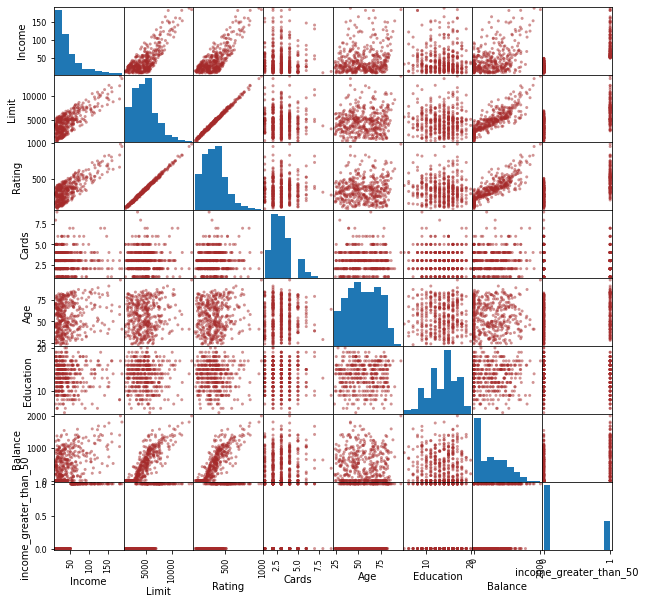

In [85]:
_ = pd.plotting.scatter_matrix(df, color='brown', figsize=(10, 10))

Podział na zbiór treningowy i walidacyjny:

In [108]:
mask = np.random.rand(len(df)) < 0.8

training_set = df[mask]
validation_set = df[~mask]

Tablica z opisami testowanych modeli:

In [211]:
model_formulas = ['income_greater_than_50 ~ Limit + Rating + Cards + Age + Education + Balance', 
                  'Cards ~ Income*Limit + Rating + Age + Education + Balance + I(np.square(Income))']



Kod funkcji przeprowadzającej regresje logistyczną:

In [171]:
def my_logistic_regression(training_set, validation_set, model_formula):
    y_train, X_train = dmatrices(model_formula, data=training_set, return_type='dataframe')
    y_valid, X_valid = dmatrices(model_formula, data=validation_set, return_type='dataframe')
    
    model = LogisticRegression(fit_intercept=False, C=1e9, solver='liblinear')
    
    y_train = np.array(y_train).reshape(len(y_train,))
    
    result = model.fit(X_train, y_train)
    
    print(f'Skuteczność na zbiorze treningowym: {accuracy_score(y_train, model.predict(X_train))}')
    
    print(f'Skuteczność na zbiorze walidacyjnym: {accuracy_score(y_valid, model.predict(X_valid))}')

In [172]:
my_logistic_regression(training_set, validation_set, model_formulas[0])

Skuteczność na zbiorze treningowym: 0.9548387096774194
Skuteczność na zbiorze walidacyjnym: 0.9666666666666667


Jak widać dla zamieszczonego modelu uzyskałem największą skuteczność predykcji na zbiorze treningowym i walidacyjnym. Jest to jeden z kilku testowanych przeze mnie modeli (sprawdzałem modele z gwiazdką, ale dodawanie gwiazdek powodowało zmniejszenie skuteczności dla obu zbiorów). W następnym kroku utworzymy model z liczbą kart posiadaną przez osobę jako zmienną zależną:

In [212]:
my_logistic_regression(training_set, validation_set, model_formulas[1])

Skuteczność na zbiorze treningowym: 0.42258064516129035
Skuteczność na zbiorze walidacyjnym: 0.3


Jak widać dla drugiego modelu osiągnołem największą skuteczność predykcji na obu zbiorach (oba modele były testowane na tak samo podzielonych zbiorach danych, więc to porównanie ma sens, aczkolwiek w celu lepszej ewaluacji modeli należałoby zastosować walidację krzyżową). Jak widać pierwszy model uzyskuje bardzo dobre wyniki na obu zbiorach (średnio $96 \%$), a drugi kiepskie (średnio $30 \%$). Patrząc na otrzymaną macierz zależności można zauważyć, że w pierwszym przypadku istnieją jasne zależności między faktem posiadania przychodów większych niż $50.0$ a niektórymi zmiennymi. W drugim przypadku, dla każdej ze zmiennych objaśniających, nie widać żadnych zależności. Zatem to może być powodem, dla którego w drugim przypadku otrzymujemy tak słabe wyniki. 

### Zadanie 3

W zadaniu 3 należało powtórzyć to co w zadaniu 2, ale przy użyciu algorytmu K najbliższych sąsiadów oraz drzew decyzyjnych jako klasyfikatorów. Najpierw (ponownie) przygotuje zbiory z danymi i odpowiedziami:

In [241]:
y, X = dmatrices(model_formulas[0], data=training_set, return_type='dataframe')

y = y.values.ravel()

Następnie przygotuje modele KNN i DT z różnymi liczbami sprawdzanych sąsiadów oraz maksymalnymi głębokościami drzew dla pierwszego zadania:

In [242]:
models = []
numbers_of_neighbors = [1, 2, 3, 4, 5]
maximum_depths = [7, 8, 9, 10, 11]

for num in numbers_of_neighbors:
    models.append((f'KNN{num}', KNeighborsClassifier(n_neighbors=num)))
    
for md in maximum_depths:
    models.append((f'DT{md}', DecisionTreeClassifier(max_depth=md)))
    

Teraz dokonajmy ewaluacji obu modeli:

In [244]:
def evaluate_models(y, X, models):
    results = []
    names = []
    scoring = f'accuracy'

    for m in models:
        name, estimator = m

        names.append(name)

        kfold = model_selection.KFold(n_splits=10, random_state=1, shuffle=True)

        cv_results = model_selection.cross_val_score(estimator, X, y, cv=kfold, scoring=scoring)

        results.append(cv_results)

        print(f'name: {name} ; mean: {cv_results.mean()} ; std: {cv_results.std()}')
    
    return names, results

Sprawdźmy działanie powyższej funkcji:

In [245]:
names, results = evaluate_models(y, X, models)

name: KNN1 ; mean: 0.9290322580645161 ; std: 0.04279515858523097
name: KNN2 ; mean: 0.9225806451612903 ; std: 0.046073731797050654
name: KNN3 ; mean: 0.9161290322580644 ; std: 0.05806451612903228
name: KNN4 ; mean: 0.9129032258064516 ; std: 0.06129032258064517
name: KNN5 ; mean: 0.9258064516129032 ; std: 0.04093089529177265
name: DT7 ; mean: 0.9032258064516128 ; std: 0.053978066228004884
name: DT8 ; mean: 0.9 ; std: 0.06681391992647737
name: DT9 ; mean: 0.903225806451613 ; std: 0.06288254416005784
name: DT10 ; mean: 0.9032258064516128 ; std: 0.05948093198253478
name: DT11 ; mean: 0.8903225806451612 ; std: 0.06321263852343685


Następnie narysujmy box plot przedstawiający porównanie powyższych modeli:

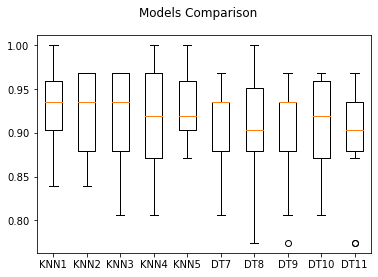

In [246]:
fig = plt.figure()
fig.suptitle('Models Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

W następnym kroku zajmiemy się drugim problemem klasyfikacji z poprzedniego zadania:

In [247]:
y, X = dmatrices(model_formulas[1], data=training_set, return_type='dataframe')

y = y.values.ravel()

Jak poprzednio, dokonajmy ewaluacji poszczególnych klasyfikatorów:

In [248]:
names, results = evaluate_models(y, X, models)

name: KNN1 ; mean: 0.2290322580645161 ; std: 0.04881530951748889
name: KNN2 ; mean: 0.2548387096774193 ; std: 0.07694748672178428
name: KNN3 ; mean: 0.2774193548387096 ; std: 0.09481895778515528
name: KNN4 ; mean: 0.27419354838709675 ; std: 0.09038016597498
name: KNN5 ; mean: 0.2580645161290322 ; std: 0.08655747009676606
name: DT7 ; mean: 0.26774193548387093 ; std: 0.050077982891161374
name: DT8 ; mean: 0.2387096774193548 ; std: 0.07096774193548387
name: DT9 ; mean: 0.26129032258064516 ; std: 0.07960621083389074
name: DT10 ; mean: 0.2419354838709677 ; std: 0.09810907306932613
name: DT11 ; mean: 0.2709677419354839 ; std: 0.07241917522788274


A oto box plot przedstawiający porównanie powyższych modeli:

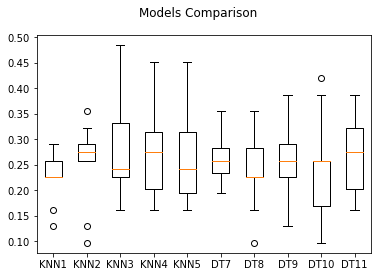

In [249]:
fig = plt.figure()
fig.suptitle('Models Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Jak widać zastosowanie regresji logistycznej dla obu przypadków dało (nieznacznie) lepsze wyniki. W obu przypadkach średnia skuteczność klasyfikatorów KNN i DT była podobna. W przypadku pierwszego problemu najlepsze wyniki dał klasyfikator KNN dla $n = 1$. W drugim przypadku dobrze się zachowywał DT dla $d = 7$ oraz KNN dla $n = 2$.

### Zadanie 4

W zadaniu 4 należało wybrać dwa predyktory numeryczne (które wydają się istotne) i narysować dla nich granice decyzyjne dla różnych modeli takich jak: regresja logistyczna, KNN, DT oraz RF. Najpierw tworze sobie tablice z nazwami klasyfikatorów oraz z samymi klasyfikatorami:

In [322]:
names = [
    "Logistic Regression"
    "Nearest Neighbors",
    "Decision Tree",
    "Random Forest",
]

classifiers = [
    LogisticRegression(fit_intercept=False, C=1e9),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
]

Następnie tworzę zbiór X (dane, czyli wartości wybranych 2 predyktorów ciągłych) oraz y (odpowiedzi) dla obu przypadków z zadania 2. W pierwszym przypadku użyłem zmiennych *Limit* i *Age*, a w drugim *Income* i *Education*. Za to odpowiada poniższy kod:

In [324]:
X1 = df.iloc[:, [1, 4]]
X2 = df.iloc[:, [0, 5]]

In [325]:
X1

,Limit,Age
0,3606,34
1,6645,82
2,7075,71
3,9504,36
4,4897,68
...,...,...
395,4100,32
396,3838,65
397,4171,67
398,2525,44


In [326]:
X2

,Income,Education
0,14.891,11
1,106.025,15
2,104.593,11
3,148.924,11
4,55.882,16
...,...,...
395,12.096,13
396,13.364,17
397,57.872,12
398,37.728,13


Analogicznie robimy z *y*:

In [327]:
y1 = df.iloc[:, [11]]
y2 = df.iloc[:, [3]]

In [328]:
y1

,income_greater_than_50
0,0
1,1
2,1
3,1
4,1
...,...
395,0
396,0
397,1
398,0


In [329]:
y2

,Cards
0,2
1,3
2,4
3,3
4,2
...,...
395,3
396,5
397,5
398,1


Sprawdźmy jakie są wartości minimalne i maksymalne dla *Cards*:

In [330]:
print(f'Maks: {y2.max()} ; Min: {y2.min()}')

Maks: Cards    9
dtype: int64 ; Min: Cards    1
dtype: int64


Poniżej tworzę funkcje do rysowania granic decyzyjnych:

In [380]:
def draw_decision_boundary(X, y, classifier, colors, classes, title, y_name):
    x_label, y_label = list(X.columns.values)
    
    c = classifier.fit(X, y)
    
    disp = DecisionBoundaryDisplay.from_estimator(c, 
                                              X, 
                                              response_method="predict",
                                              xlabel=x_label, ylabel=y_label,
                                              alpha=0.5, 
                                              cmap=plt.cm.coolwarm)
    
    
    for cl in classes:
        idxs = list(y.loc[y[y_name] == cl].index)
        
        disp.ax_.scatter(X.iloc[idxs, 0], X.iloc[idxs, 1], 
                         c=colors[cl], edgecolor="k",
                         cmap=plt.cm.coolwarm)
    
    plt.title(title)
    plt.show()

In [383]:
colors1 = {0: '#0000ff', 1: '#ff0000'}
colors2 = {1: '#ff0000', 2: '#00ff00', 3: '#0000ff', 4: '#effbf9', 5: '#65468e', 6: '#f77319', 7: '#f6fab4', 8: '#16fab4', 9: '#ff5ef6'}

Poniżej znajdują się granice decyzyjne dla wszystkich ww. klasyfikatorów:

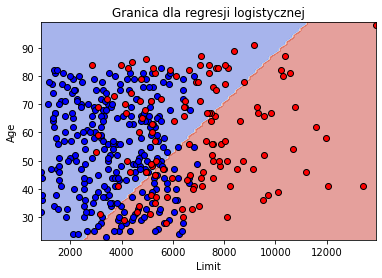

In [384]:
draw_decision_boundary(X1, y1, classifiers[0], colors1, range(0, 2), f'Granica dla regresji logistycznej', 'income_greater_than_50')

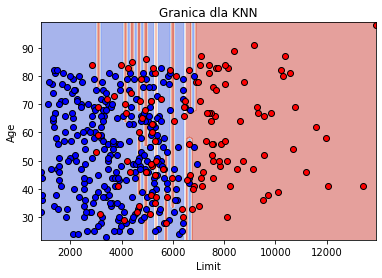

In [385]:
draw_decision_boundary(X1, y1, classifiers[1], colors1, range(0, 2), f'Granica dla KNN', 'income_greater_than_50')

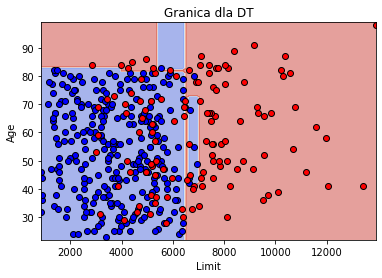

In [386]:
draw_decision_boundary(X1, y1, classifiers[2], colors1, range(0, 2), f'Granica dla DT', 'income_greater_than_50')

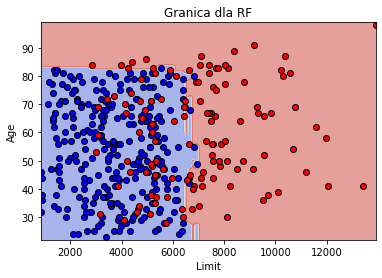

In [387]:
draw_decision_boundary(X1, y1, classifiers[3], colors1, range(0, 2), f'Granica dla RF', 'income_greater_than_50')

A teraz narysujemy granice decyzyjne dla drugiego przypadku z zadania 2:

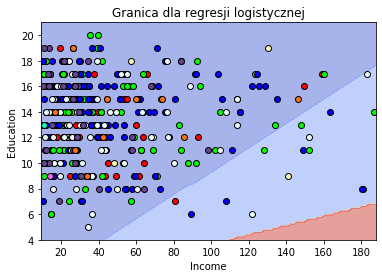

In [388]:
draw_decision_boundary(X2, y2, classifiers[0], colors2, range(1, 10), f'Granica dla regresji logistycznej', 'Cards')


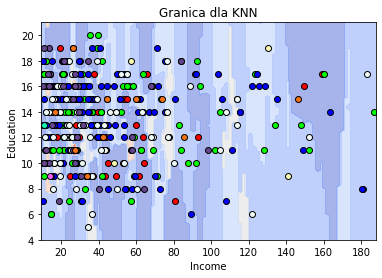

In [389]:
draw_decision_boundary(X2, y2, classifiers[1], colors2, range(1, 10), f'Granica dla KNN', 'Cards')

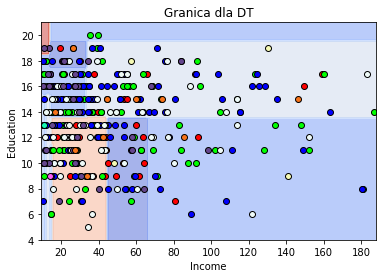

In [390]:
draw_decision_boundary(X2, y2, classifiers[2], colors2, range(1, 10), f'Granica dla DT', 'Cards')

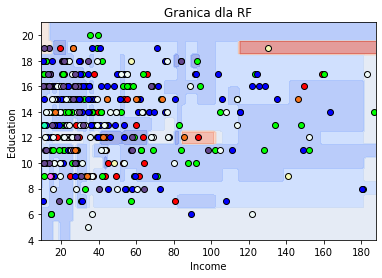

In [391]:
draw_decision_boundary(X2, y2, classifiers[3], colors2, range(1, 10), f'Granica dla RF', 'Cards')